# 🔄 Flujos de trabajo básicos con modelos de GitHub (Python)

## 📋 Tutorial de orquestación de flujos de trabajo

Este cuaderno presenta las potentes capacidades del **Constructor de Flujos de Trabajo** del Marco de Agentes de Microsoft. Aprende a crear flujos de trabajo sofisticados y de múltiples pasos que pueden manejar procesos empresariales complejos y coordinar múltiples operaciones de IA sin problemas.

## 🎯 Objetivos de aprendizaje

### 🏗️ **Arquitectura de flujos de trabajo**
- **Constructor de Flujos de Trabajo**: Diseña y orquesta procesos complejos de múltiples pasos
- **Ejecución basada en eventos**: Maneja eventos de flujo de trabajo y transiciones de estado
- **Diseño visual de flujos de trabajo**: Crea y visualiza estructuras de flujo de trabajo
- **Integración con modelos de GitHub**: Aprovecha los modelos de IA en contextos de flujo de trabajo

### 🔄 **Orquestación de procesos**
- **Operaciones secuenciales**: Encadena múltiples tareas de agentes en orden lógico
- **Lógica condicional**: Implementa puntos de decisión y flujos de trabajo ramificados
- **Manejo de errores**: Recuperación robusta de errores y resiliencia en flujos de trabajo
- **Gestión de estados**: Rastrea y administra el estado de ejecución del flujo de trabajo

### 📊 **Patrones de flujo de trabajo empresarial**
- **Automatización de procesos empresariales**: Automatiza flujos de trabajo organizacionales complejos
- **Coordinación de múltiples agentes**: Coordina múltiples agentes especializados
- **Ejecución escalable**: Diseña flujos de trabajo para operaciones a escala empresarial
- **Monitoreo y observabilidad**: Rastrea el rendimiento y los resultados de los flujos de trabajo

## ⚙️ Prerrequisitos y configuración

### 📦 **Dependencias requeridas**

Instala el Marco de Agentes con capacidades de flujo de trabajo:

```bash
pip install agent-framework-core -U
```

### 🔑 **Configuración de modelos de GitHub**

**Configuración del entorno (archivo .env):**
```env
GITHUB_TOKEN=your_github_personal_access_token
GITHUB_ENDPOINT=https://models.inference.ai.azure.com
GITHUB_MODEL_ID=gpt-4o-mini
```

### 🏢 **Casos de uso empresariales**

**Ejemplos de procesos empresariales:**
- **Incorporación de clientes**: Flujos de trabajo de verificación y configuración en múltiples pasos
- **Pipeline de contenido**: Creación, revisión y publicación de contenido automatizado
- **Procesamiento de datos**: Flujos ETL con transformación impulsada por IA
- **Garantía de calidad**: Procesos automatizados de prueba y validación

**Beneficios de los flujos de trabajo:**
- 🎯 **Fiabilidad**: Ejecución determinista con recuperación de errores
- 📈 **Escalabilidad**: Automatización de procesos de alto volumen
- 🔍 **Observabilidad**: Rastreos completos de auditoría y monitoreo
- 🔧 **Mantenibilidad**: Diseño visual y componentes modulares

## 🎨 Patrones de diseño de flujos de trabajo

### Estructura básica del flujo de trabajo
```mermaid
graph TD
    A[Start] --> B[Agent Task 1]
    B --> C{Decision Point}
    C -->|Success| D[Agent Task 2]
    C -->|Failure| E[Error Handler]
    D --> F[End]
    E --> F
```

**Componentes clave:**
- **WorkflowBuilder**: Motor principal de orquestación
- **WorkflowEvent**: Manejo de eventos y comunicación
- **WorkflowViz**: Representación visual del flujo de trabajo y depuración

¡Construyamos tu primer flujo de trabajo inteligente! 🚀


In [ ]:
! pip install agent-framework-core -U

In [2]:
# 🔄 Import Workflow and Agent Framework Components
# Core components for building sophisticated agent workflows

from agent_framework.openai import OpenAIChatClient    # 🤖 GitHub Models client integration
from agent_framework import WorkflowBuilder, WorkflowEvent, WorkflowViz  # 🏗️ Workflow orchestration tools
from agent_framework import Agent

In [3]:
# 📦 Import Environment and System Utilities
# Essential libraries for configuration and environment management

import os                      # 🔧 Environment variable access
from dotenv import load_dotenv # 📁 Secure configuration loading

In [4]:
# 🔧 Initialize Environment Configuration
# Load GitHub Models API credentials from .env file
load_dotenv()

True

In [5]:
# 🔗 Initialize GitHub Models Chat Client for Workflow Operations
# Create the AI client that will power agents within our workflow
chat_client = OpenAIChatClient(
    base_url=os.environ.get("GITHUB_ENDPOINT"),    # 🌐 GitHub Models API endpoint
    api_key=os.environ.get("GITHUB_TOKEN"),        # 🔑 Authentication token
    model_id=os.environ.get("GITHUB_MODEL_ID")  # 🎯 Selected AI model
)

In [6]:
REVIEWER_NAME = "Concierge"
REVIEWER_INSTRUCTIONS = """
    You are an are hotel concierge who has opinions about providing the most local and authentic experiences for travelers.
    The goal is to determine if the front desk travel agent has recommended the best non-touristy experience for a traveler.
    If so, state that it is approved.
    If not, provide insight on how to refine the recommendation without using a specific example. 
    """

In [7]:
FRONTDESK_NAME = "FrontDesk"
FRONTDESK_INSTRUCTIONS = """
    You are a Front Desk Travel Agent with ten years of experience and are known for brevity as you deal with many customers.
    The goal is to provide the best activities and locations for a traveler to visit.
    Only provide a single recommendation per response.
    You're laser focused on the goal at hand.
    Don't waste time with chit chat.
    Consider suggestions when refining an idea.
    """

In [ ]:
#Este no lo tomes por el momento
reviewer_agent   = chat_client.create_agent(
        instructions=(
           REVIEWER_INSTRUCTIONS
        ),
        name=REVIEWER_NAME,
    )

front_desk_agent = chat_client.create_agent(
        instructions=(
            FRONTDESK_INSTRUCTIONS
        ),
        name=FRONTDESK_NAME,
    )

In [8]:
reviewer_agent = Agent(
    client=chat_client,
    name=REVIEWER_NAME,
    instructions=REVIEWER_INSTRUCTIONS
)

front_desk_agent = Agent(
    client=chat_client,
    name=FRONTDESK_NAME,
    instructions=FRONTDESK_INSTRUCTIONS
)

In [9]:
#Tampoco la tomemos
workflow = WorkflowBuilder().set_start_executor(front_desk_agent).add_edge(front_desk_agent, reviewer_agent).build()

TypeError: WorkflowBuilder.__init__() missing 1 required keyword-only argument: 'start_executor'

In [10]:
workflow = (WorkflowBuilder(start_executor=front_desk_agent)
            .add_edge(front_desk_agent, reviewer_agent)
            .build()
)

In [11]:

print("Generating workflow visualization...")
viz = WorkflowViz(workflow)
# Print out the mermaid string.
print("Mermaid string: \n=======")
print(viz.to_mermaid())
print("=======")
# Print out the DiGraph string.
print("DiGraph string: \n=======")
print(viz.to_digraph())
print("=======")
svg_file = viz.export(format="svg")
print(f"SVG file saved to: {svg_file}")

Generating workflow visualization...
Mermaid string: 
flowchart TD
  FrontDesk["FrontDesk (Start)"];
  Concierge["Concierge"];
  FrontDesk --> Concierge;
DiGraph string: 
digraph Workflow {
  rankdir=TD;
  node [shape=box, style=filled, fillcolor=lightblue];
  edge [color=black, arrowhead=vee];

  "FrontDesk" [fillcolor=lightgreen, label="FrontDesk\n(Start)"];
  "Concierge" [label="Concierge"];
  "FrontDesk" -> "Concierge";
}
SVG file saved to: C:\Users\CESARI~1\AppData\Local\Temp\tmpisro6o58.svg


In [12]:
class DatabaseEvent(WorkflowEvent): ...

Attempting to display SVG file at: C:\Users\CESARI~1\AppData\Local\Temp\tmpisro6o58.svg


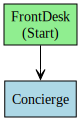

In [13]:
# Display the exported workflow SVG inline in the notebook

from IPython.display import SVG, display, HTML
import os

print(f"Attempting to display SVG file at: {svg_file}")

if svg_file and os.path.exists(svg_file):
    try:
        # Preferred: direct SVG rendering
        display(SVG(filename=svg_file))
    except Exception as e:
        print(f"⚠️ Direct SVG render failed: {e}. Falling back to raw HTML.")
        try:
            with open(svg_file, "r", encoding="utf-8") as f:
                svg_text = f.read()
            display(HTML(svg_text))
        except Exception as inner:
            print(f"❌ Fallback HTML render also failed: {inner}")
else:
    print("❌ SVG file not found. Ensure viz.export(format='svg') ran successfully.")


In [ ]:
#Este no lo tomes por el momento
result =''
async for event in workflow.run_stream('I would like to go to Paris.'):
    if isinstance(event, DatabaseEvent):
        print(f"{event}")
    if isinstance(event, WorkflowEvent):
        result += str(event.data)
        # print(f"Workflow output: {event.data}")

In [14]:
print("Ejecutando el workflow...")

response = await workflow.run('I would like to go to Paris.')

print(f"Workflow completed with response: {response}")


Ejecutando el workflow...
Workflow completed with response: [WorkflowEvent(type='executor_invoked', executor_id='FrontDesk', data='I would like to go to Paris.'), WorkflowEvent(type='output', executor_id='FrontDesk', data=<agent_framework._types.AgentResponse object at 0x00000218D00780E0>), WorkflowEvent(type='executor_completed', executor_id='FrontDesk', data=[AgentExecutorResponse(executor_id='FrontDesk', agent_response=<agent_framework._types.AgentResponse object at 0x00000218D00780E0>, full_conversation=[<agent_framework._types.Message object at 0x00000218CF98EAE0>, <agent_framework._types.Message object at 0x00000218CFB39460>]), <agent_framework._types.AgentResponse object at 0x00000218CFB395B0>]), WorkflowEvent(type='superstep_started', iteration=1), WorkflowEvent(type='executor_invoked', executor_id='Concierge', data=AgentExecutorResponse(executor_id='FrontDesk', agent_response=<agent_framework._types.AgentResponse object at 0x00000218D00E7830>, full_conversation=[<agent_framewo

In [17]:
# Asumiendo que guardaste el resultado en una variable llamada 'resultado'
# Si no, vuelve a correr: resultado = await workflow.run("I would like to go to Paris.")

print(f"🚀 INICIO DEL WORKFLOW: Viaje a París\n{'='*40}")

# Recorremos cada evento que ocurrió
for evento in response:
    
    # 1. Cuando un Agente TERMINA de hablar (output)
    if hasattr(evento, 'type') and evento.type == 'output':
        print(f"\n🗣️  AGENTE: {evento.executor_id}")
        
        # Intentamos sacar el texto del mensaje
        datos = evento.data
        
        # A veces el texto está en .content, a veces en .message.content
        if hasattr(datos, 'message') and hasattr(datos.message, 'content'):
            print(f"💬 DIJO: {datos.message.content}")
        elif hasattr(datos, 'content'):
            print(f"💬 DIJO: {datos.content}")
        else:
            print(f"📦 DATA CRUDA: {datos}")
            
    # 2. Cuando el Workflow termina un paso importante (superstep)
    elif hasattr(evento, 'type') and evento.type == 'superstep_completed':
        print(f"\n✅ Paso {evento.iteration} completado.")
        print("-" * 20)

print(f"\n{'='*40}\n🏁 FIN DEL PROCESO")

🚀 INICIO DEL WORKFLOW: Viaje a París

🗣️  AGENTE: FrontDesk
📦 DATA CRUDA: Visit the Louvre Museum for an incredible art experience.

🗣️  AGENTE: Concierge
📦 DATA CRUDA: While the Louvre is a magnificent place, it tends to attract a lot of tourists and can feel overwhelming. Consider suggesting experiences that delve into the lesser-known neighborhoods, like exploring local street markets or finding cozy cafes where you can interact with residents. This approach will give you a more authentic feel for Parisian life.

✅ Paso 1 completado.
--------------------

✅ Paso 2 completado.
--------------------

🏁 FIN DEL PROCESO


In [16]:
response.replace("None", "")

AttributeError: 'WorkflowRunResult' object has no attribute 'replace'


---

**Descargo de responsabilidad**:  
Este documento ha sido traducido utilizando el servicio de traducción automática [Co-op Translator](https://github.com/Azure/co-op-translator). Aunque nos esforzamos por garantizar la precisión, tenga en cuenta que las traducciones automatizadas pueden contener errores o imprecisiones. El documento original en su idioma nativo debe considerarse como la fuente autorizada. Para información crítica, se recomienda una traducción profesional realizada por humanos. No nos hacemos responsables de malentendidos o interpretaciones erróneas que puedan surgir del uso de esta traducción.
